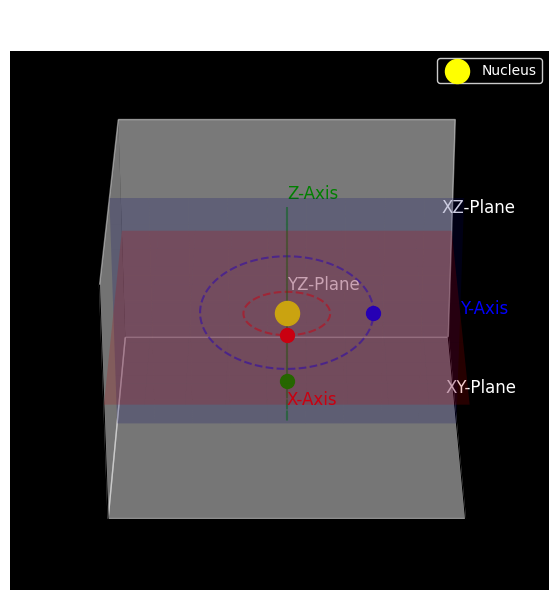

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Create 3D figure ---
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', facecolor='black')
ax.set_title("3D Atom Model with Rotating Orbitals", color='white', pad=20)

# --- Draw nucleus ---
ax.scatter(0, 0, 0, color='yellow', s=300, label='Nucleus')

# --- Orbit colors and radii ---
orbit_colors = ['red', 'blue', 'green']
orbit_radii = [2, 4, 6]

# --- Define orbit orientations (XY, XZ, YZ planes) ---
orbit_normals = [
    np.array([0, 0, 1]),  # XY-plane
    np.array([1, 0, 0]),  # YZ-plane
    np.array([0, 1, 0])   # XZ-plane
]

# --- Draw XY, YZ, XZ planes with colors and low opacity ---
# Create and plot the XY-plane (z=0) in red
x = np.linspace(-8, 8, 10)
y = np.linspace(-8, 8, 10)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
ax.plot_surface(X, Y, Z, color='red', alpha=0.2)

# Create and plot the YZ-plane (x=0) in blue
Z = np.linspace(-8, 8, 10)
Y = np.linspace(-8, 8, 10)
X = np.zeros_like(Z)
Y, Z = np.meshgrid(Y, Z)
ax.plot_surface(X, Y, Z, color='blue', alpha=0.2)

# Create and plot the XZ-plane (y=0) in green
X = np.linspace(-8, 8, 10)
Z = np.linspace(-8, 8, 10)
Y = np.zeros_like(X)
X, Z = np.meshgrid(X, Z)
ax.plot_surface(X, Y, Z, color='green', alpha=0.2)

# --- Label the planes with axis names ---
ax.text(7, 7, 0, "XY-Plane", color="white", fontsize=12)
ax.text(7, 0, 7, "YZ-Plane", color="white", fontsize=12)
ax.text(0, 7, 7, "XZ-Plane", color="white", fontsize=12)

# --- Labeling the coordinate axes (X, Y, Z) ---
# Add labels for X, Y, Z axes at the corners for clarity
ax.text(8, 0, 0, "X-Axis", color="red", fontsize=12)
ax.text(0, 8, 0, "Y-Axis", color="blue", fontsize=12)
ax.text(0, 0, 8, "Z-Axis", color="green", fontsize=12)
#------------------------------------------------------------------------------
# --- Draw orbits ---
theta = np.linspace(0, 2*np.pi, 200)

for color, r, n in zip(orbit_colors, orbit_radii, orbit_normals):
    if np.allclose(n, [0, 0, 1]):  # XY-plane
        x, y, z = r*np.cos(theta), r*np.sin(theta), np.zeros_like(theta)
    elif np.allclose(n, [1, 0, 0]):  # YZ-plane
        x, y, z = np.zeros_like(theta), r*np.cos(theta), r*np.sin(theta)
    else:  # XZ-plane
        x, y, z = r*np.cos(theta), np.zeros_like(theta), r*np.sin(theta)
    ax.plot(x, y, z, color=color, linestyle='--', alpha=0.5)

# --- Create electrons (scatter objects to update later) ---
electrons = [ax.scatter([], [], [], color=color, s=100) for color in orbit_colors]

# --- Set axis properties ---
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([-8, 8])
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')
ax.view_init(elev=30, azim=45)
#------------------------------------------------------------------------------
# --- Animation update function ---
def update(frame):
    for i, (r, n) in enumerate(zip(orbit_radii, orbit_normals)):
        angle = frame * (0.05 + i*0.02)
        if np.allclose(n, [0, 0, 1]):  # XY-plane
            x, y, z = r*np.cos(angle), r*np.sin(angle), 0
        elif np.allclose(n, [1, 0, 0]):  # YZ-plane
            x, y, z = 0, r*np.cos(angle), r*np.sin(angle)
        else:  # XZ-plane
            x, y, z = r*np.cos(angle), 0, r*np.sin(angle)
        electrons[i]._offsets3d = ([x], [y], [z])

    # Rotate the entire view slowly
    ax.view_init(elev=30, azim=frame * 0.6)
    return electrons

# --- Create animation ---
ani = FuncAnimation(fig, update, frames=360, interval=50, blit=False)

# --- Display animation inline in Colab ---
HTML(ani.to_html5_video())